In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# K-nearest neighbors algorithm

In this document I will implement the k-nearest neighbors machine learning algorithm to make predictions in a specific subject. I will use a well known dataset in the scikitlearn pyhton library which has diferent qualities of wines and one of 3 possible classes they belong to.  

The logic behind this algorithm is, given some data, it will predict some result depending on the proximity of the data-point we are analysing to other points (already labelled) in a N-dimensional space (N being the number of qualities we are studying about the system).

In [2]:
from sklearn.datasets import load_wine
wine=load_wine()
print(wine.feature_names)
print(wine.target_names)
print(len(wine['data']))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
178


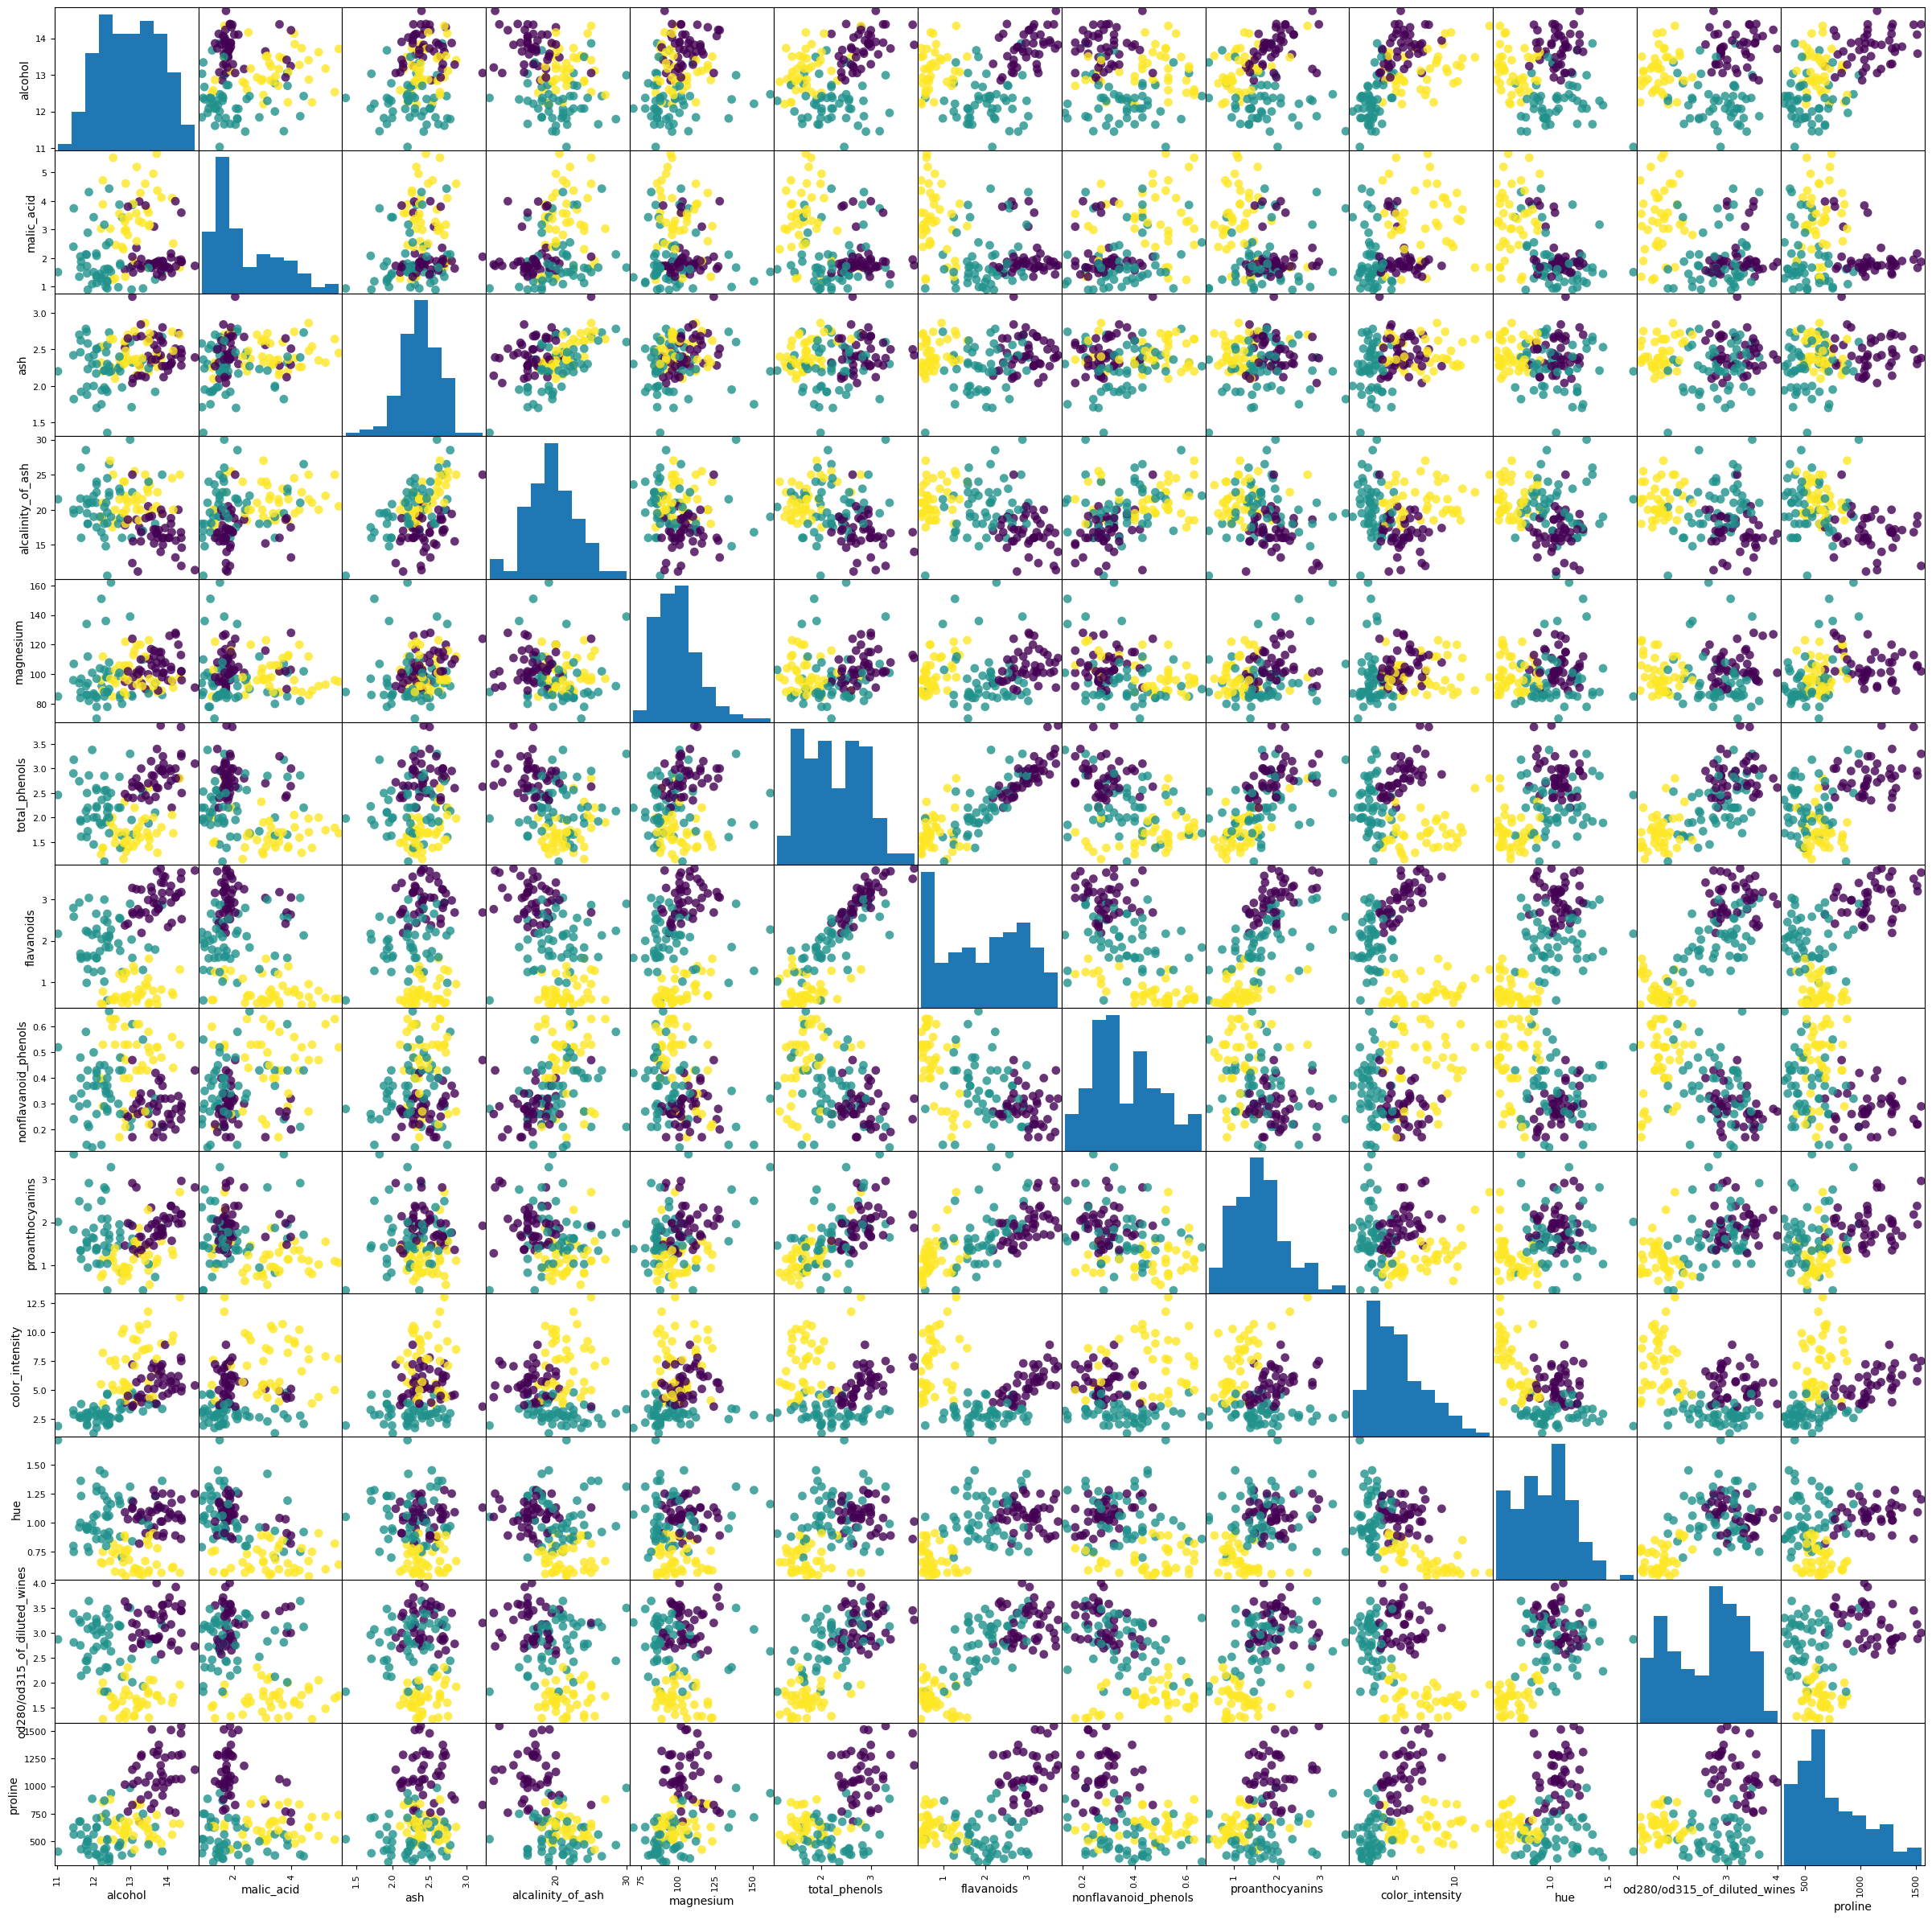

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(wine['data'],wine['target'],
                                              random_state=0)

wine_dataframe=pd.DataFrame(X_train, columns=wine.feature_names)
grr=pd.plotting.scatter_matrix(
    wine_dataframe,c=y_train,marker='o',figsize=(30,30),s=60,alpha=.8)

In [4]:
print(len(X_train))

133


As we can see form the scatter plots, the diferent classes appear to be separated into relatively distinct groups in most plots. Therefore, this data set is a good candidate to implement the k-nearest neighbors algorithm.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [6]:
print('Test score: %.2f'%(KNN.score(X_test,y_test)))

Test score: 0.76


We can see we obtained a score of 76%, which means that out of all the testing set, it guessed the right type 76% of the time. For such a simple model, this is a fairly acceptable result, however, there is still room for improvement. We can recall to the begining of this document, that the k-nearest neighbors algorithm works by classifying a sample point based on its closest neighbors in an N-dimentional space. Therefore, it is important to take in acount the fact that many of the measurements have very diferent scales. Because of these discrepencies, the model does not treat every input the same, giving priority to the measurements with the bigest ranges.
  
  
Fortunately, there is an easy fix to this problem. We can scale the inputs to ensure neither will have a bigger priority.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled,y_train)
print('Test score: %.2f'%(knn.score(X_test_scaled,y_test)))

Test score: 0.93


As we can see, given the same data, we were able to improve our score from 76% to 93% just by scaling the data inputs.
  
Another thing improvement we could implement is trying diferent values for the number of neighbors considered. In all examples above, we used 1 as our base line. However, it is possible we could achieve better results with different values.

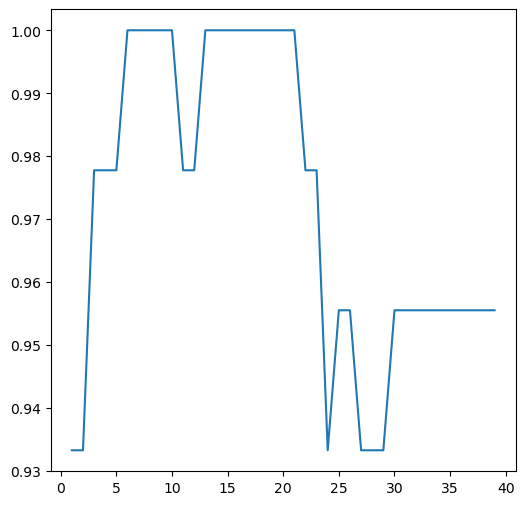

In [8]:
K=np.arange(1,40)
S=np.zeros(len(K),float)
for i,k in enumerate(K):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    S[i]=knn.score(X_test_scaled,y_test)

fig=plt.figure(figsize=(6,6))
plt.plot(K,S)
plt.show()

As we can see, the accuracy of our model can vary greatly depending on the number of neighbors we choose to analise. Although one might assume a greater value would give better results, that is not necessarily true. If the model starts looking at farther and farther neighbors, it will eventually be influenced by data that is very different from the object we are studying. That influence might lead to incorect results as it is essentialy working as noise in our model.
  
Therefore, it is often good practice to choose moderate values of neighbors. Adequate values will vary with each situation.